# Perceptron - classification using gradient descent (exercise)

In this exercise, implement a single neuron (perceptron) for classification of two species of flowers using stochastic gradient descent.

The Iris data set consists of 50 samples from each of three species of flowers (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

For the purpose of this exercise, use only two features (sepal length and sepal width) of two specie of flowers (Setosa and Versicolor).

In [15]:
# allow inline plotting below each cell
%matplotlib inline

In [16]:
# import necessary libraries 
from matplotlib import pyplot as plt
import numpy as np
import time 
from IPython import display 

In [17]:
# write a function that plots data and classification line
def plot_border(w1, b, data, fig):
    
    plt.axis([0, 10, 0, 6])
    plt.grid()
    
    # scatter data
    for i in range(len(data)) :
        point = data[i]
        color = "r"
        if point[2] == 0 :
            color = "b"
        plt.scatter(point[0], point[1], c=color)

    # separation line
    x = np.linspace(0, 10, 100)
    plt.plot(x, w1*x+b, '-g', label='y=w1*x+b')
    plt.show()

In [18]:
# write a prediction function: 0 for Iris-setosa and 1 for Iris-versicolor
def guess_flower(SepalLength, SepalWidth) :
    z = SepalLength * w1 + SepalWidth * w2 + b
    if (z<0):
        print('Iris-setosa')
    else:
        print('Iris-versicolor')

In [19]:
### load data ###

# each point is a tuple (sepal length, sepal width, flower type)
# types: 0 for Setosa and 1 for Versicolor
data = [[ 5.1,  3.5,  0 ],
       [ 4.9,  3. ,  0 ],
       [ 4.7,  3.2,  0 ],
       [ 4.6,  3.1,  0 ],
       [ 5. ,  3.6,  0 ],
       [ 5.4,  3.9,  0 ],
       [ 4.6,  3.4,  0 ],
       [ 5. ,  3.4,  0 ],
       [ 4.4,  2.9,  0 ],
       [ 4.9,  3.1,  0 ],
       [ 5.4,  3.7,  0 ],
       [ 4.8,  3.4,  0 ],
       [ 4.8,  3. ,  0 ],
       [ 4.3,  3. ,  0 ],
       [ 5.8,  4. ,  0 ],
       [ 5.7,  4.4,  0 ],
       [ 5.4,  3.9,  0 ],
       [ 5.1,  3.5,  0 ],
       [ 5.7,  3.8,  0 ],
       [ 5.1,  3.8,  0 ],
       [ 7. ,  3.2,  1 ],
       [ 6.4,  3.2,  1 ],
       [ 6.9,  3.1,  1 ],
       [ 5.5,  2.3,  1 ],
       [ 6.5,  2.8,  1 ],
       [ 5.7,  2.8,  1 ],
       [ 6.3,  3.3,  1 ],
       [ 4.9,  2.4,  1 ],
       [ 6.6,  2.9,  1 ],
       [ 5.2,  2.7,  1 ],
       [ 5. ,  2. ,  1 ],
       [ 5.9,  3. ,  1 ],
       [ 6. ,  2.2,  1 ],
       [ 6.1,  2.9,  1 ],
       [ 5.6,  2.9,  1 ],
       [ 6.7,  3.1,  1 ],
       [ 5.6,  3. ,  1 ],
       [ 5.8,  2.7,  1 ],
       [ 6.2,  2.2,  1 ],
       [ 5.6,  2.5,  1 ],
       [ 5.9,  3.2,  1 ],
       [ 6.1,  2.8,  1 ],
       [ 6.3,  2.5,  1 ],
       [ 6.1,  2.8,  1 ],
       [ 6.4,  2.9,  1 ]]

# mystery_flower = [ 6.6,  3]

In [20]:
len(data)

45

In [21]:
type(data)

list

In [22]:
# write functions that compute the output of a sigmoid activation function and its derivative

def sigmoid(x) :
    return 1/(1 + np.exp(-x))

def sigmoid_p(x) :
    return sigmoid(x) * (1-sigmoid(x))

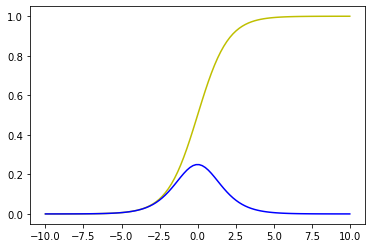

In [23]:
# visualize activation function and its derivative

T = np.linspace(-10, 10, 100)
plt.plot(T, sigmoid(T), c='y')
plt.plot(T, sigmoid_p(T), c='b')

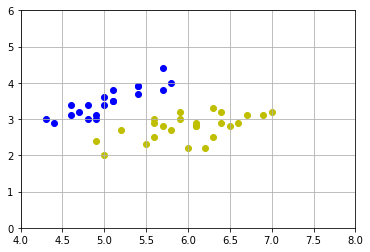

In [24]:
# visualize data
plt.axis([4, 8, 0, 6])
plt.grid()
for i in range(len(data)) :
    point = data[i]
    color = "y"
    if point[2] == 0 :
        color = "b"
    plt.scatter(point[0], point[1], c=color)

In [25]:
# write a training loop

learning_rate = 1
J = []
n = 100

dz_dw1=0
dz_dw2=0
dz_db=0
# initialize weights and bias
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()


# inside the loop:
J, dw1, dw2, db = (0,0,0,0)
m=len(data)
J_list = []
# compute gradients

for i in range (n):
    for j in range (m):
        point = data[j]
        x1 = point [0]
        x2 = point [1]
        y = point [2]

        z = x1 * w1 + x2 * w2 + b

        a = sigmoid(z)
        
        
    
    # compute cost function
        J += -(y*np.log(a)+(1-y)*np.log(1-a))

        #derivative of the cost function

        dz = a-y    
        dz_dw1 += x1 * dz
        dz_dw2 += x2 * dz
        dz_db += dz
    
    J = J/m
    dz_dw1 =  dz_dw1/m
    dz_dw2 = dz_dw2/m
    dz_db = dz_db/ m
    b=b-dz_db
    J_list.append(J)
    
        # update weights and bias
    w1 = w1 - learning_rate * dz_dw1
    w2 = w2 - learning_rate * dz_dw2
    b = b - learning_rate * dz_db
    
    
    # this is only for the graph shown below
    
    counter = 0
   # prediction on the test data
    for k in range(len(data)):
       # get the points from the test data
        x1, x2 = test_data[k][0], test_data[k][1]
        label = int(test_data[k][2])
       # compute z
        z = x1 * w1 + x2 * w2 + b
       # and pass z through sigmoid to get a value btw 0 and 1
        prediction = sigmoid(z)
       # here we check whether the prediction says setosa or versicolor
       # and then compare it with the correct label from the dataset
        if prediction < 0.5:
            p = 0 # setosa
            if p == label:
                counter += 1
        elif prediction > 0.5:
            p = 1 # versicolor
            if p == label:
                counter += 1
   # in every epoch, we display the prediction accuracy and the loss
       
    print(f"Epoch {i}")
    print(f"Prediction:  {prediction}")
    print(f"Loss: {J}")
    print("Accuracy: ", counter/len(test_data))
    xx = np.linspace (3,8,100)
    yy= -w1/w2 * xx
    np_data = np.array(data)
    plt.scatter (np_data[:,0],np_data[:,1], c = np_data[:,2])
    plt.plot (xx,yy)
    plt.grid()
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
      
    plt.axis([3,8,1,5])
    display.clear_output(wait=True)
    time.sleep(0.1)

    plt.show()


        # plot costs
#plt.plot(costs)




NameError: name 'test_data' is not defined

In [ ]:
 # plot costs
plt.plot(range(100),J_list)

In [ ]:
# make predictions on test data 

test_data = [[ 5.4,  3.4,  0. ],
           [ 4.6,  3.6,  0. ],
           [ 5.1,  3.3,  0. ],
           [ 4.8,  3.4,  0. ],
           [ 5. ,  3. ,  0. ],
           [ 5. ,  3.4,  0. ],
           [ 5.2,  3.5,  0. ],
           [ 5.2,  3.4,  0. ],
           [ 4.7,  3.2,  0. ],
           [ 4.8,  3.1,  0. ],
           [ 5.4,  3.4,  0. ],
           [ 5.2,  4.1,  0. ],
           [ 5.5,  4.2,  0. ],
           [ 4.9,  3.1,  0. ],
           [ 5. ,  3.2,  0. ],
           [ 5.5,  3.5,  0. ],
           [ 4.9,  3.1,  0. ],
           [ 4.4,  3. ,  0. ],
           [ 5.1,  3.4,  0. ],
           [ 5. ,  3.5,  0. ],
           [ 4.5,  2.3,  0. ],
           [ 4.4,  3.2,  0. ],
           [ 5. ,  3.5,  0. ],
           [ 5.1,  3.8,  0. ],
           [ 4.8,  3. ,  0. ],
           [ 5.1,  3.8,  0. ],
           [ 4.6,  3.2,  0. ],
           [ 5.3,  3.7,  0. ],
           [ 5. ,  3.3,  0. ],
           [ 6.8,  2.8,  1. ],
           [ 6.7,  3. ,  1. ],
           [ 6. ,  2.9,  1. ],
           [ 5.7,  2.6,  1. ],
           [ 5.5,  2.4,  1. ],
           [ 5.5,  2.4,  1. ],
           [ 5.8,  2.7,  1. ],
           [ 6. ,  2.7,  1. ],
           [ 5.4,  3. ,  1. ],
           [ 6. ,  3.4,  1. ],
           [ 6.7,  3.1,  1. ],
           [ 6.3,  2.3,  1. ],
           [ 5.6,  3. ,  1. ],
           [ 5.5,  2.5,  1. ],
           [ 5.5,  2.6,  1. ],
           [ 6.1,  3. ,  1. ],
           [ 5.8,  2.6,  1. ],
           [ 5. ,  2.3,  1. ],
           [ 5.6,  2.7,  1. ],
           [ 5.7,  3. ,  1. ],
           [ 5.7,  2.9,  1. ],
           [ 6.2,  2.9,  1. ],
           [ 5.1,  2.5,  1. ],
           [ 5.7,  2.8,  1. ]]



In [ ]:
for i in range(len(test_data)) :
    point = test_data[i]
    print(point)
    
    z = point[0] * w1 + point[1] * w2 + b
    prediction = sigmoid(z)
    print("prediction : {}" .format(prediction))

In [ ]:
# predict the mystery flower 
mystery_flower = [ 6.6,  3]
z = mystery_flower[0] * w1 + mystery_flower[1] * w2 + b
prediction = sigmoid(z)
prediction

In [ ]:
guess_flower(4.8, 3.0)

In [ ]:
# compute and plot the classification line

fig2 = plt.figure()
plot_border(-w1/w2, -b/w2, test_data, fig2)